<a href="https://colab.research.google.com/github/Soumyaa2005/iiit_labs/blob/main/Probability_Features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

import plotly.graph_objects as pg
import plotly.express as px

In [ ]:
def toss_coin(number_of_tosses=100):
    return pd.Series(np.random.choice(['Heads', 'Tails'], number_of_tosses))

def throw_dice(number_of_tosses=100):
    return pd.Series(np.random.randint(1, 6+1, number_of_tosses))

In [ ]:
results = toss_coin()
print(results.value_counts())
fig = pg.Figure([pg.Bar(x=results.value_counts().keys(),
                        y=results.value_counts().values)])
fig.show()

Tails    54
Heads    46
Name: count, dtype: int64


In [ ]:
results = pd.Series([np.sum(toss_coin(20) == 'Heads') for _ in range(1000)])
fig = pg.Figure([pg.Bar(x=results.value_counts().keys(),
                        y=results.value_counts().values)])
fig.show()

In [ ]:
results = pd.Series([np.sum(toss_coin(500) == 'Heads') for _ in range(5000)])
fig = pg.Figure([pg.Bar(x=results.value_counts().keys(),
                        y=results.value_counts().values)])
fig.show()

In [ ]:
results = {shots: throw_dice(shots) for shots in [10, 100, 1000, 10000, 1000000]}
fig = pg.Figure([pg.Bar(x=result.value_counts().keys(),
                        y=result.value_counts().values / shots,)
                    for shots, result in results.items()])
fig.add_shape(type='line', x0=0.5, y0=1/6, x1=6.5, y1=1/6, line=dict(color='Red',))
fig.show()

In [ ]:
def number_of_numbered_cards_drawn_before_ace(trials=100, show_trials=10):
    values = ['A', '2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K']
    ranks = ['H', 'D', 'C', 'S']

    cards_thrown_counts = []
    for experiment in range(trials):
        deck_of_cards = [value + rank for value in values for rank in ranks]
        cards_thrown = 0
        cards_pile = []
        while len(deck_of_cards) > 0:
            picked_card = np.random.choice(deck_of_cards)
            cards_pile.append(picked_card)
            if picked_card[0] == 'A':
                break
            cards_thrown += 1
            deck_of_cards.remove(picked_card)
        if experiment < show_trials:
            print(cards_thrown, 'cards were thrown:', ' '.join(cards_pile))
        cards_thrown_counts.append(cards_thrown)

    return np.mean(cards_thrown_counts), cards_thrown_counts

expected_cards_thrown, cards_thrown_counts = number_of_numbered_cards_drawn_before_ace(10000)
print(f'\n{expected_cards_thrown} cards are tossed before we see the first ace!')

2 cards were thrown: 10H 10S AC
17 cards were thrown: 10D 6H KD JC 10H 6S 7D KS 4H 4D 5C QS QH 7C 8D 3H JD AD
6 cards were thrown: 4H 4C 3S KC 7S 9D AC
15 cards were thrown: 9S 8H 5D 4H 10C 9D 2D JC 2S 7D 3H JD 4D KC 9C AC
2 cards were thrown: 3D JS AS
2 cards were thrown: 7D 4H AD
2 cards were thrown: 8D 6S AC
30 cards were thrown: 10H 8C 3H KS 6S 10C 4S 8H QC JS 4H 6C 9S KH 4C 2H 2C KD QD 10D 5C KC 3D 3C 8S JD 6H 5H 7S 7H AS
18 cards were thrown: 10C 8D 7H QH 9S QD 9D 3C 5H 5D 4C KC JH 8S 4S 10D 2S 9H AH
9 cards were thrown: KS QS KH KD 4C QD 6C 4D JD AC

9.6087 cards are tossed before we see the first ace!


In [ ]:
results = pd.Series(cards_thrown_counts)
fig = pg.Figure([pg.Bar(x=results.value_counts().keys(),
                        y=results.value_counts().values)])
fig.show()

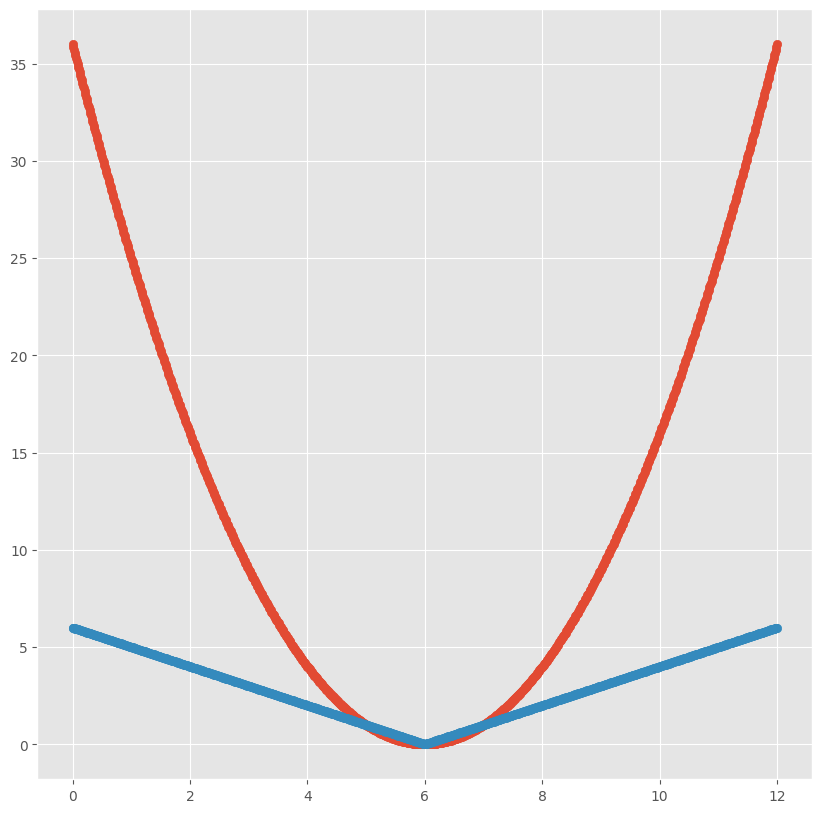

In [ ]:
from matplotlib import pyplot as plt
plt.style.use('ggplot')
plt.figure(figsize=(10, 10))

measurements = np.linspace(0, 12, 1000)
plt.scatter(measurements, (measurements - 6) ** 2, label='Squared Error')
plt.scatter(measurements, abs(measurements - 6), label='Absolute Error')
plt.show()

In [ ]:
import pandas as pd

grades = pd.read_csv("https://archive.org/download/ml-fundamentals-data/machine-learning-fundamentals-data/grades.csv")
print("Data shape:", grades.shape)
print("Missing values in each column:\n", grades.isnull().sum())
numeric_cols = grades.select_dtypes(include='number')
numeric_cols = numeric_cols.fillna(0)
result = numeric_cols.agg(["mean", "var", "std"])
print(result)

HTTPError: HTTP Error 503: Service Temporarily Unavailable

In [ ]:
g = sns.FacetGrid(grades.melt("Name"), col="variable")
g.map(plt.hist, "value")

HTTPError: HTTP Error 503: Service Temporarily Unavailable

In [ ]:
grades["Physics_std"] = (grades["Physics"] - grades["Physics"].mean()) / grades["Physics"].std()

NameError: name 'grades' is not defined

In [ ]:
grades.head()

NameError: name 'grades' is not defined

In [ ]:
grades["Maths_std"] = (grades["Maths"] - grades["Maths"].mean()) / grades["Maths"].std()
grades.head()

NameError: name 'grades' is not defined

In [ ]:
from scipy.stats import binom
binom.pmf(k=5, n=5, p=0.25)
1 - binom.pmf(k=4, n=5, p=0.75) - binom.pmf(k=5, n=5, p=0.75)
binom.cdf(3, n=5, p=0.75)
from scipy.stats import norm

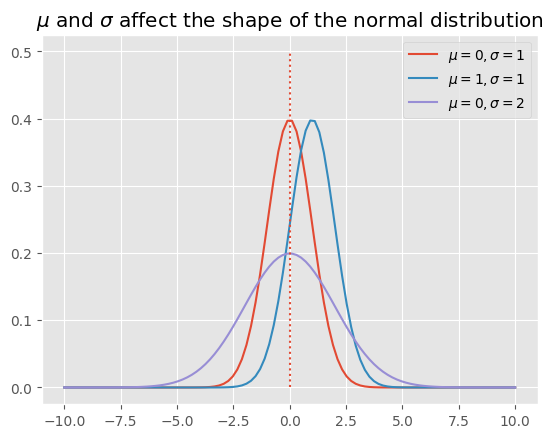

In [ ]:
x = np.linspace(-10, 10, 100)
f1 = norm.pdf(x, loc=0, scale=1)
f2 = norm.pdf(x, loc=1, scale=1)
f3 = norm.pdf(x, loc=0, scale=2)

plt.plot(x, f1, label="$\mu=0, \sigma=1$")
plt.plot(x, f2, label="$\mu=1, \sigma=1$")
plt.plot(x, f3, label="$\mu=0, \sigma=2$")
plt.vlines(x=0, ymin=0, ymax=0.5, linestyles="dotted")

plt.legend()
plt.title("$\mu$ and $\sigma$ affect the shape of the normal distribution")
plt.show()

In [ ]:
norm.cdf(0)

0.5

In [ ]:
norm.ppf(0.5)

0.0

In [ ]:
norm.ppf(0.84, loc=169.57, scale=7.57)

177.09804617589782

In [ ]:
169.57 + 7.57

177.14

In [ ]:
norm.ppf(0.975, loc=169.57, scale=7.57)

184.4069273629682

In [ ]:
169.57 + 2 * 7.57

184.70999999999998

In [ ]:
norm.ppf(0.0015, loc=169.57, scale=7.57)
169.57 - 3 * 7.57

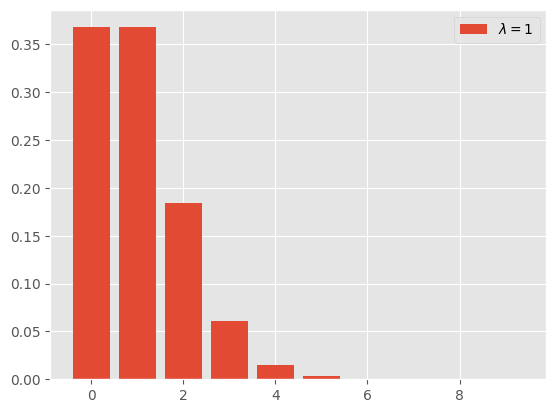

In [ ]:
from scipy.stats import poisson
x = np.arange(10)
f1 = poisson.pmf(x, mu=1)
f2 = poisson.pmf(x, mu=2)
f3 = poisson.pmf(x, mu=3)

plt.bar(x, f1, label="$\lambda=1$")
plt.legend()

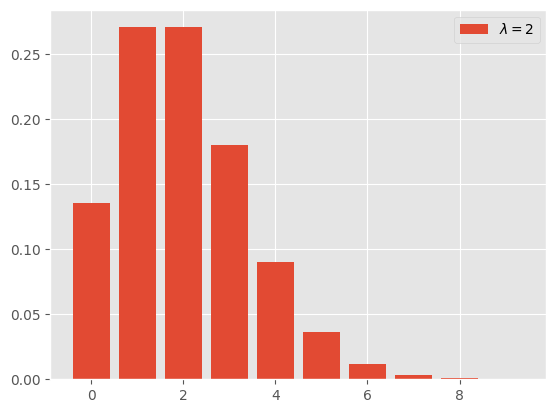

In [ ]:
x @ f1
plt.bar(x, f2, label="$\lambda=2$")
plt.legend()

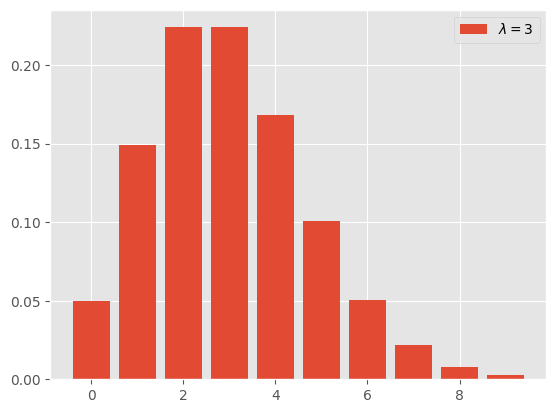

In [ ]:
x @ f2
plt.bar(x, f3, label="$\lambda=3$")
plt.legend()

In [ ]:
x @ f3

2.9885910238149727

In [ ]:
poisson.pmf(3, 5)

0.1403738958142805

(array([  8.,  13.,  35.,  68.,  78., 103.,  45.,  35.,  12.,   3.]),
 array([1.95, 2.17, 2.39, 2.61, 2.83, 3.05, 3.27, 3.49, 3.71, 3.93, 4.15]),
 <BarContainer object of 10 artists>)

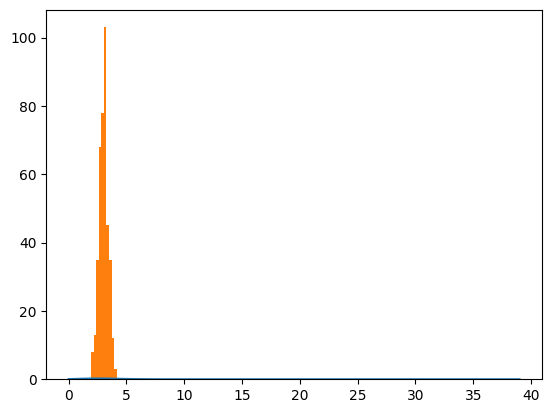

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson
bins = np.arange(0, 40)
p_pois = poisson.pmf(bins, mu=3)
plt.plot(bins, p_pois)
def sample_pois(_):
    samples = poisson.rvs(mu=3, size=20)
    return np.mean(samples)

means = list(map(sample_pois, np.arange(400)))
plt.hist(means)

If you have a shuffled deck of 52 cards, there are 4 aces, 4 kings, 4 queeens, 4 jacks, and 4 of each numbered card from 2 to 10. What is the probability that if you draw a card at random it will be a numbered card.

In [ ]:
import random

def probability_numbered_card():
    total_cards = 52
    numbered_cards = 36
    return numbered_cards / total_cards
print("Probability of drawing a numbered card:", probability_numbered_card())

Probability of drawing a numbered card: 0.6923076923076923


In the same setup as above, you take on card out and look at it, put it back into the deck and shuffle it. Now you pull another card output. What is the probability that both the cards you pulled out are numbered cards.

In [ ]:
import random
def probability_two_numbered_cards_with_replacement():
    prob_numbered_card = probability_numbered_card()
    return prob_numbered_card * prob_numbered_card
print("Probability of drawing two numbered cards with replacement:", probability_two_numbered_cards_with_replacement())


Probability of drawing two numbered cards with replacement: 0.4792899408284023


Same Problem as above, but now when you pull out one card, you throw it out and do not put it back into the deck. Find the probability now that they are both numbered cards that you drew.

In [ ]:
import random
def probability_two_numbered_cards_without_replacement():
    total_cards = 52
    numbered_cards = 36
    prob_first = numbered_cards / total_cards
    prob_second = (numbered_cards - 1) / (total_cards - 1)
    return prob_first * prob_second
print("Probability of drawing two numbered cards without replacement:", probability_two_numbered_cards_without_replacement())

Probability of drawing two numbered cards without replacement: 0.4751131221719457


In [ ]:
def probability_cut_numbered_card():
    total_cards = 52
    numbered_cards = 36
    return numbered_cards / total_cards
print("Probability of cutting the deck at a numbered card:", probability_cut_numbered_card())

Probability of cutting the deck at a numbered card: 0.6923076923076923
